<a href="https://colab.research.google.com/github/intuition-explorer/ML-Algorithms/blob/main/Epsilon%3ENerve%3EPH_ToyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

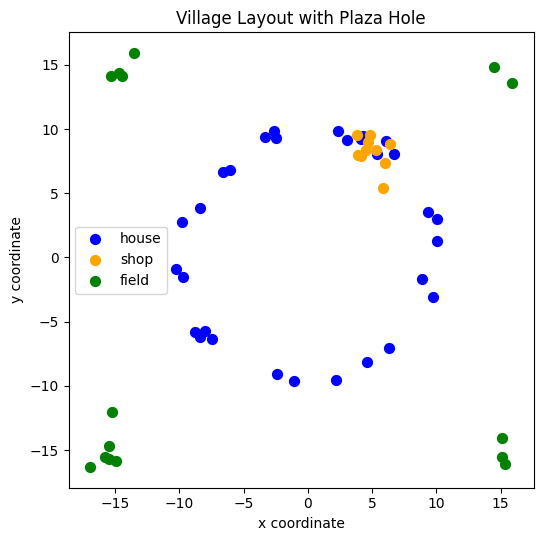

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(42)

# --- Houses in a ring around a plaza ---
n_houses = 30
angles_h = np.random.uniform(0, 2*np.pi, n_houses)
r_houses = np.random.normal(10, 0.5, n_houses)  # ring radius ~10
houses_x = r_houses * np.cos(angles_h)
houses_y = r_houses * np.sin(angles_h)
houses = pd.DataFrame({'x': houses_x, 'y': houses_y, 'type': 'house'})

# --- Shops clustered near one side ---
n_shops = 10
shops_x = np.random.normal(5, 1, n_shops)
shops_y = np.random.normal(8, 1, n_shops)
shops = pd.DataFrame({'x': shops_x, 'y': shops_y, 'type': 'shop'})

# --- Fields outside the village ---
n_fields = 15
fields_x = np.random.normal(0, 1, n_fields) + np.random.choice([-15, 15], n_fields)
fields_y = np.random.normal(0, 1, n_fields) + np.random.choice([-15, 15], n_fields)
fields = pd.DataFrame({'x': fields_x, 'y': fields_y, 'type': 'field'})

# Combine all
village = pd.concat([houses, shops, fields], ignore_index=True)

# Plot
plt.figure(figsize=(6, 6))
for t, color in zip(['house', 'shop', 'field'], ['blue', 'orange', 'green']):
    subset = village[village['type'] == t]
    plt.scatter(subset['x'], subset['y'], label=t, color=color, s=50)

plt.title("Village Layout with Plaza Hole")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [32]:
print(village) #This is given data set from GPT and image above is plotting of it

            x          y   type
0   -6.644846   6.683358  house
1    9.703252  -3.104701  house
2   -1.095038  -9.637671  house
3   -8.020715  -5.724723  house
4    5.400275   8.056704  house
5    6.084813   9.074997  house
6    9.335112   3.566618  house
7    6.315710  -7.057931  house
8   -8.379817  -6.178451  house
9   -2.445058  -9.065642  house
10  10.020037   1.303228  house
11   8.859434  -1.695229  house
12   4.622633  -8.111130  house
13   2.367357   9.817022  house
14   4.307133   9.432370  house
15   4.098096   9.215565  house
16  -3.323216   9.370330  house
17  -9.730532  -1.525903  house
18  -8.426928   3.840335  house
19  -2.469428   9.318424  house
20  -7.454660  -6.314643  house
21   6.736922   8.091012  house
22  -2.662154   9.817262  house
23  -6.088464   6.788025  house
24  -9.777384   2.769450  house
25   2.150012  -9.568892  house
26   3.004407   9.182531  house
27 -10.264647  -0.920501  house
28  -8.792030  -5.768531  house
29  10.023062   3.011287  house
30   4.1

In [33]:
print(village.head())

          x         y   type
0 -6.644846  6.683358  house
1  9.703252 -3.104701  house
2 -1.095038 -9.637671  house
3 -8.020715 -5.724723  house
4  5.400275  8.056704  house


In [34]:
#Collect numerical data point
import numpy as np
coord = village[['x','y']].to_numpy() #to look at multiple columns in a dataframe need 2 square brackets
label = village ['type'].to_numpy() #convert from series (not dataframe only 1 col) to numpy array->matrix of labels
print(coord)
print(label)

[[ -6.64484621   6.68335841]
 [  9.70325213  -3.10470054]
 [ -1.09503775  -9.63767073]
 [ -8.02071535  -5.7247235 ]
 [  5.40027472   8.05670401]
 [  6.0848129    9.07499683]
 [  9.33511156   3.5666182 ]
 [  6.31570994  -7.05793077]
 [ -8.3798172   -6.17845109]
 [ -2.44505786  -9.0656423 ]
 [ 10.02003683   1.30322826]
 [  8.85943424  -1.69522876]
 [  4.6226331   -8.11112953]
 [  2.36735702   9.81702204]
 [  4.30713305   9.43237001]
 [  4.09809638   9.21556459]
 [ -3.32321647   9.37033047]
 [ -9.73053172  -1.52590348]
 [ -8.42692769   3.84033548]
 [ -2.46942821   9.31842402]
 [ -7.45465956  -6.31464252]
 [  6.73692223   8.09101218]
 [ -2.66215357   9.81726233]
 [ -6.08846433   6.78802462]
 [ -9.77738433   2.76944995]
 [  2.15001153  -9.56889229]
 [  3.00440736   9.18253082]
 [-10.26464697  -0.92050124]
 [ -8.79202981  -5.76853076]
 [ 10.02306216   3.01128656]
 [  4.16078248   7.92798988]
 [  4.69078762   9.0035329 ]
 [  5.33126343   8.36163603]
 [  5.97554513   7.35488025]
 [  4.52082576

In [35]:
#indices of both arrays should be same as original and can check w/
for i in range(5):
    print(coord[i], label[i])

[-6.64484621  6.68335841] house
[ 9.70325213 -3.10470054] house
[-1.09503775 -9.63767073] house
[-8.02071535 -5.7247235 ] house
[5.40027472 8.05670401] house


In [36]:
def distance_from_origin(coord):
    return np.sqrt(np.sum(coord**2)) #alternatively can use np.linalg.norm(coord)
distance_from_origin(coord[0]) #[0] takes first row

np.linalg.norm(coord, axis = 1) #axis=1 makes it do each row separately

array([ 9.42450321, 10.18784901,  9.69968066,  9.85415313,  9.69914669,
       10.92613909,  9.99325139,  9.47114454, 10.41127246,  9.38957818,
       10.1044318 ,  9.02016494,  9.33590698, 10.09843062, 10.36923329,
       10.08568414,  9.94217586,  9.84944815,  9.260739  ,  9.6400779 ,
        9.76968061, 10.52856111, 10.17180914,  9.11847992, 10.16204198,
        9.80745886,  9.661539  , 10.30583814, 10.51549976, 10.46564006,
        8.95349844, 10.15219647,  9.91661872,  9.47636022,  9.50530389,
       10.68419492,  8.86502646, 10.29326247,  7.92039135, 10.87325853,
       20.60334712, 20.82565504, 21.63832774, 23.54977684, 19.41632468,
       22.24703754, 20.88374709, 22.05089944, 22.14917769, 21.36248073,
       20.89669324, 20.51347403, 20.73680568, 20.25341094, 21.73587512])

In [37]:
#distance_points should be x0-x1 etc..
def distance_points(coord1, coord2): #cant take in (coord, coord) as same, so it takes in 2 inputs and i think of them as coord1 and 2, it doesnt know
  diff = coord1 - coord2 #store diff as a variable
  return np.sqrt(np.sum(diff**2))
distance_points(coord[0], coord[1]) # in fxn def i couldve used p1 and p2, based on following lines it would assume thats 2 arrays (of nums)

#This was Euclidean Metric- L2 Norm

np.float64(19.05430181005347)

In [38]:
#distance with Manhattan Metric-L1 Norm-TaxiCab
def manhattan_distance(p1,p2):
  abs_diff = np.abs(p1-p2) #find abs diff of points-> this returns array abs diff of x and y coords
  return np.sum(abs_diff)

manhattan_distance(coord[0], coord[1])

np.float64(26.136157293847752)

In [39]:
#These are examples of norms that induce metrics: have Top>Metric>Norm>Inner>Vector
#Norm assigns lengths or size to a vector
#Chebyshev Norm-L infinity

def chebyshev_distance(p1,p2):
  abs_diff = np.abs(p1-p2) #find abs diff of points-> this returns array abs diff of x and y coords
  return np.max(abs_diff)
chebyshev_distance(coord[0], coord[1])

np.float64(16.34809834383359)

In [40]:
#Lp in general comes from functional analysis & normed vector spaces, p is parameter>=1
#in general: take abs of each component of a vector, raise each to power of p, sum, take pth root (power of 1/p)
#Euclidean power=2, manhattan p=1 and abs not implicit
#As unit ball: L1 is diamond, L2 is circle, Linf is square aligned with axis
#p changes how distances are measured

In [41]:
#General Metric Induced Norm when p finite, not including Cheb
def distance_Lp(coord1, coord2, p):
    diff = coord1 - coord2
    return np.sum(np.abs(diff)**p)**(1/p)
distance_Lp(coord[0], coord[1],1)

np.float64(26.136157293847752)

In [42]:
#Linear Regression Variants: Ridge and Lasso this is regularization to prevent overfitting: Loss= Data fit + lambda x Penalty
#Penalty depends on norm, penalized quadraticaly, linearly, or max (Linf e.g. Cheby)
#L2 norm ball=circle RIDGE, here shrinks coefficients smoothly penalizes large weights quadratically
#L1 norm ball=diamond LASSO, encorages sparsity of coefficents and penalizes abs weights linearly
#Here Constraint sets/Penalty Balls & contour sets of least squares from diff geo view
#Loss Surface=Bowl above coefficient space(weights), contours of equal LSE=ellipses
#If L2 penalty is circle/sphere if L1 its a diamond. Minimize LSE with penalty constraint, where they touch
#Langrange multipliers norm:constraint and LSE:objective, L1 does feature selection innately
#Pentalty term is a norm on the parameter vector to regularize coefficent and control complexity
#*LSE loss is dicated by Euclidean metric(Gaussian noise leads to squared error)

In [43]:
#Top>Metric>Norm>Inner>Vector
#Vector space is purely algebaric structure: vec add + scalar multiply
#top can exist w.o metric some nonmetricizable exist, metric can exist w.o norm ex discrete metric below, norm can exist without inner prouct like manhattan
#inner product space cannot exist without vector space
#norm induces inner only when obeys parralelogram law (L2, not L1 or Linf), norm induces metric (mostly used in data)

In [44]:
#copy and paste metric, just needs to fit axioms: non neg, if d=0 then x=y, symmetry of dxy=dyx and triangle ineq
def discrete_metric(x, y):
    return 0 if np.array_equal(x, y) else 1
print(discrete_metric(coord[0], coord[1])) #0 if x=y, else 1 when x!=y
print(discrete_metric(coord[0], coord[0]))

1
0


In [45]:
#Epsilon Ball: given p(coordinates) and d(distance fnx) then it's the set of points q s.t. d(p,q) =< e
#This is all points within radius e of p; Given array/list of points with fixed e for each point pi find all points d(pi, pj) =< e

def epsilon_balls(coord_array, radius, distance):
  n = len(coord_array) #gives list of all points-number of rows/samples

  neighbours = [] #empty list that will store neighbors for each point , will become list of n
  # each element will be a list of indices of points near that point; neighbours[i]= points within epsilon of point i

  for i in range(n): #loops over all points pi in list by index, this is coord[i] (vector with coordinates x[i], y[i])
    ball = [] #for each coord[i] start a new empty list, to collect indices of points within epsilon

    for j in range(n): #for every other point, pj, check if it's close to pi
      if i == j:
        continue #skip if i==j, if they're the same point distance=0, don't include as a neighbour

      distance = distance_points(coord[i], coord[j]) #BUG: had indent so wasn't being run

      if distance <= radius:
          ball.append(j) #j is the index of the neighbour, easier to work with for future stuff, else can append(coord[j])

    neighbours.append(ball) #After checking all points against pi, add the list of neighbors (ball) to the main list neighbours

  return neighbours
  #Process: For each point pi (i from 0 to 54), it loops through all points  pj  (j from 0 to 54), computes the distance, and if within epsilon, adds j to neighbors of i

In [46]:
epsilon_balls(coord, 5, distance_points)

[[16, 18, 19, 23],
 [10, 11],
 [9, 25],
 [8, 17, 20, 28],
 [5, 13, 14, 15, 21, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [4, 13, 14, 15, 21, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [10, 29, 38],
 [12, 25],
 [3, 17, 20, 28],
 [2, 25],
 [1, 6, 11, 29],
 [1, 10, 29],
 [7, 25],
 [4, 5, 14, 15, 19, 21, 26, 30, 31, 32, 33, 34, 35, 36, 37, 39],
 [4, 5, 13, 15, 21, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [4, 5, 13, 14, 21, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [0, 19, 22, 23],
 [3, 8, 24, 27, 28],
 [0, 23, 24],
 [0, 13, 16, 22, 23],
 [3, 8, 28],
 [4, 5, 13, 14, 15, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [16, 19, 23],
 [0, 16, 18, 19, 22],
 [17, 18, 27],
 [2, 7, 9, 12],
 [4, 5, 13, 14, 15, 21, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [17, 24],
 [3, 8, 17, 20],
 [6, 10, 11, 38],
 [4, 5, 13, 14, 15, 21, 26, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [4, 5, 13, 14, 15, 21, 26, 30, 32, 33, 34, 35, 36, 37, 38, 39],
 [4, 5, 13, 14, 15, 21, 26, 30, 31, 33, 34, 35, 36, 37, 38

In [47]:
#Now create graph. Vertex is a point, edge if points are neighbours of each other

In [48]:
import networkx as nx #package for working with graphs/networks

In [49]:
G= nx.Graph()
print(G)
G.add_nodes_from(range(len(coord))) #len is integer of 55, range creates sequences

Graph with 0 nodes and 0 edges


In [50]:
print(G) #node will store coord indices to make future work easier

Graph with 55 nodes and 0 edges


In [51]:
for i in range(len(coord)): #loop over nodes/coordinates of dataset, i is in the index=anchor point
  for j in range(i+1, len(coord)): #produces integers 1+i, j is the index of the other point/edges
  #avoids duplicates/double edges with i+1 check i,j only once and avoids self loops as j never equals i. Don't want edges like i,i
  #EFFECTIVELY iterates over all unordered pairs of points i,j for i<j
    if distance_points(coord[i], coord[j]) <= 2 * 5:  # 2*epsilon = 10, coord here are a vector for a point and both produce a ball check if intersect
      G.add_edge(i, j) #if True(intersect) then add undirected edge, if edge exists network ignores duplication=no double edge


In [52]:
print(G)
#his graph is exactly the 1-dimensional structure (edges) you’d get from the Čech complex or Vietoris–Rips complex, but only in dimension 1
#1 skeleton, 1 nerve simplex, need higher order simplexes and to define structures

Graph with 55 nodes and 352 edges


In [53]:
#VR is easier to code. Right now only edges=pairs of points, if more overlap get trianges->tetrahederon->k simplex
#complete subgraph=clique, size k+1 corresponds to k simplex. So 3 clique=triangle=2 simplex
# Find all cliques in the graph
cliques = list(nx.find_cliques(G))  #this returns maximal cliques ONLY
#E.G. for Triangle ABC with extra vertex D attached to AB output is ABC and ABD, doesnt show edges AB, Bc, AC, Edges and Vertices are cliques too
print(cliques)

[[0, 23, 16, 19, 24, 18], [0, 23, 16, 19, 22, 18], [0, 23, 16, 19, 22, 26, 13], [0, 23, 17, 24, 18, 27], [2, 9, 25, 12, 7], [2, 9, 3, 8, 20, 28], [3, 28, 8, 20, 44], [3, 28, 8, 20, 17, 24, 27], [3, 28, 18, 24, 17, 27], [7, 1, 25, 12], [7, 1, 11, 10], [7, 1, 11, 12], [38, 1, 10, 11, 29, 6], [38, 33, 11, 10, 29, 6], [38, 33, 4, 5, 14, 32, 34, 35, 36, 39, 15, 30, 31, 10, 29, 21, 6], [38, 33, 4, 5, 14, 32, 34, 35, 36, 39, 15, 30, 31, 37, 26, 29, 21, 6], [38, 33, 4, 5, 14, 32, 34, 35, 36, 39, 15, 30, 31, 37, 26, 13, 19, 22, 16], [38, 33, 4, 5, 14, 32, 34, 35, 36, 39, 15, 30, 31, 37, 26, 13, 19, 22, 21], [38, 33, 4, 5, 14, 32, 34, 35, 36, 39, 15, 30, 31, 37, 26, 13, 6, 21], [40, 42, 45], [41, 51, 53, 46], [43, 44, 48, 49, 54, 47], [50, 52]]


In [54]:
'''
Example clique = [[0,1,2],[2,3]]
start: simplices = []
loop clique = [0,1,2]
k=1 combinations of [0,1,2],1 gives 0, 1, 2 append (0,), (1,), (2,)
k=2 combinations of [0,1,2],2 gives (0,1), (0,2), (1,2) append these touples
k=3 combinations of ... gives (0,1,2) append
continuing for second list all together gives:
[(0,), (1,), (2,), (0,1), (0,2), (1,2), (0,1,2), (2,), (3,), (2,3)] = simplicies list
after set.. and list.. get unique tuples: [(0,), (1,), (2,), (3,), (0,1), (0,2), (1,2), (0,1,2), (2,3)]



SyntaxError: incomplete input (ipython-input-2081829883.py, line 1)

In [55]:
from itertools import combinations
# Store simplices by dimension
simplices = []
for clique in cliques:
    # For each clique, add all its subsets as simplices
    for k in range(1, len(clique) + 1):  # 1 -> points, 2 -> edges, etc.
        for subset in combinations(clique, k):
            simplices.append(subset)

# Remove duplicates
simplices = list(set(simplices))

In [57]:
#turn simplices into structured VR complex by dimension
simplices_by_dim = dict() #stores key as dimension value=set of simplices

for clique in cliques:
    clique = tuple(sorted(clique))
    m = len(clique)
    # for each non-empty subset of the clique->Faces , group by their dimension
    for k in range(1, m + 1):
        for subset in combinations(clique, k):
            dim = k - 1
            simplices_by_dim.setdefault(dim, set()).add(tuple(sorted(subset))) #no duplicates

#NERVE COMPLEX DONE-need to examine and learn code better specifically these loops

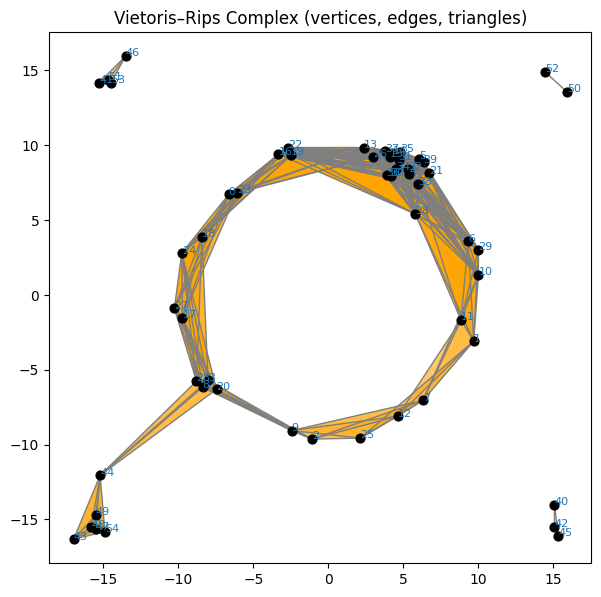

In [58]:
#copy and paste
def plot_vr_complex(coord, simplices_by_dim, figsize=(7,7), point_size=40):
    fig, ax = plt.subplots(figsize=figsize)
    coord = np.asarray(coord)

    # Plot points (vertices)
    ax.scatter(coord[:,0], coord[:,1], s=point_size, c='k', zorder=3)
    for i, (x,y) in enumerate(coord):
        ax.text(x, y, str(i), fontsize=8, color='tab:blue', zorder=4)

    # Plot edges (dim=1)
    for edge in simplices_by_dim.get(1, []):
        i, j = edge
        x = [coord[i,0], coord[j,0]]
        y = [coord[i,1], coord[j,1]]
        ax.plot(x, y, linewidth=1.0, color='tab:gray', zorder=2)

    # Plot triangles (dim=2) as filled polygons with alpha
    if 2 in simplices_by_dim:
        from matplotlib.patches import Polygon
        for tri in simplices_by_dim[2]:
            pts = coord[list(tri)]
            poly = Polygon(pts, closed=True, facecolor='orange', alpha=0.35, edgecolor='none', zorder=1)
            ax.add_patch(poly)

    ax.set_aspect('equal', adjustable='box')
    ax.set_title('Vietoris–Rips Complex (vertices, edges, triangles)')
    plt.show()

# Call it:
plot_vr_complex(coord, simplices_by_dim)


In [ ]:
#Nerve is built from episoln to now simplices of diff dimensions
#Betti numbers count holes in this shape acorss diff dim
#When epsilon varies, holes appear and disappear (get filled in), persistent homology tracks this across e
#Betti numbers are just holes alive at this e (fixed)
!pip install ripser

In [73]:
from ripser import ripser #computes PH main point of this library
result = ripser(coord, maxdim=2) #runs ripser on pointcloud(coord) computing persistent diagrams for holonomy dimensions 0,1,2
diagrams = result['dgms'] #extracts diagrams as arrays of birth-death rate per dimension diagram[0], for H0 connected components, 1=loops, etc.

def betti_at_epsilon(diagrams, epsilon): # loops over diagrams and counts how many (holes) alive at epislon || birth <= epsiolon < death
  bettis = []
  for dim, dgms in enumerate(diagrams):
    count = 0
    for birth, death in dgms:
      #death == np.inf means always persistent hole
      if birth <= epsilon and (death>epsilon or np.isinf(death)):
        count +=1
    bettis.append(count)
  return bettis

# 3) Choose your epsilon and compute Betti numbers
epsilon_value = 5.0
betti_nums = betti_at_epsilon(diagrams, epsilon_value)

print(f"Betti numbers at ε={epsilon_value}: H0={betti_nums[0]}, H1={betti_nums[1]}, H2={betti_nums[2] if len(betti_nums)>2 else 0}")

Betti numbers at ε=5.0: H0=6, H1=0, H2=0


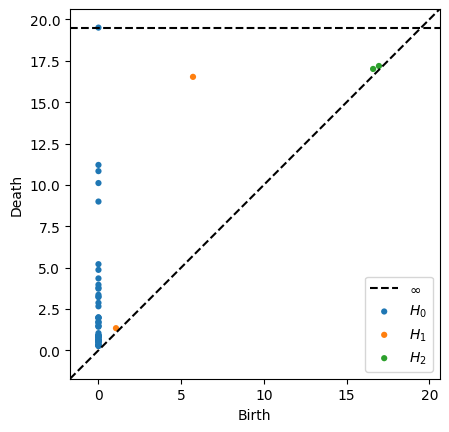

In [64]:
import matplotlib.pyplot as plt
from persim import plot_diagrams

plot_diagrams(diagrams, show=True)


In [71]:
def betti_at_epsilon(diagrams, epsilon):
    bettis = []
    for dim, dgm in enumerate(diagrams):
        count = 0
        for birth, death in dgm:
            if birth <= epsilon and (death > epsilon or np.isinf(death)):
                count += 1
        bettis.append(count)
    return bettis
for e in [0.5, 1, 2, 5, 10, 15, 20]:
    bnums = betti_at_epsilon(diagrams, e)
    print(f"ε={e}: Betti0={bnums[0]}, Betti1={bnums[1]}, Betti2={bnums[2] if len(bnums) > 2 else 0}")


ε=0.5: Betti0=48, Betti1=0, Betti2=0
ε=1: Betti0=27, Betti1=0, Betti2=0
ε=2: Betti0=16, Betti1=0, Betti2=0
ε=5: Betti0=6, Betti1=0, Betti2=0
ε=10: Betti0=4, Betti1=1, Betti2=0
ε=15: Betti0=1, Betti1=1, Betti2=0
ε=20: Betti0=1, Betti1=0, Betti2=0
